In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
hr_data=pd.read_csv("HR_Data.csv")
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
hr_data.isnull().sum() #checking for null values

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [4]:
hr_data.info()
#clearly as we can see the columns department and salary cannot be fed directly to the machine
#so we cannot use the data as it is.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
hr_data.describe() #statistical overview of the data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


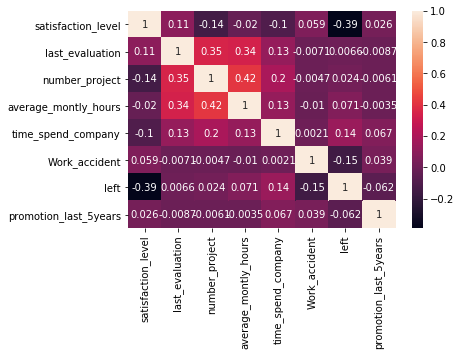

In [6]:
hr_data.corr()
sns.heatmap(hr_data.corr(),annot=True)
#From the heatmap, there is a positive(+) correlation between projectCount, averageMonthlyHours, and evaluation. 
#Which could mean that the employees who spent more hours and did more projects were evaluated highly.
#For the negative(-) relationships, turnover and satisfaction are highly correlated. 
#I'm assuming that people tend to leave a company more when they are less satisfied.

Text(0, 0.5, 'Employee Count')

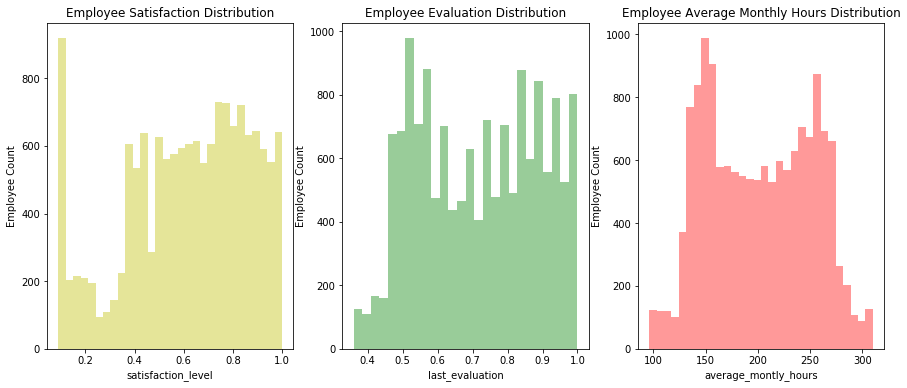

In [7]:
#Set up the matplotlib figure
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

# Graph Employee Satisfaction
sns.distplot(hr_data.satisfaction_level, kde=False, color="y", ax=axes[0]).set_title('Employee Satisfaction Distribution')
axes[0].set_ylabel('Employee Count')

# Graph Employee Evaluation
sns.distplot(hr_data.last_evaluation, kde=False, color="g", ax=axes[1]).set_title('Employee Evaluation Distribution')
axes[1].set_ylabel('Employee Count')

# Graph Employee Average Monthly Hours
sns.distplot(hr_data.average_montly_hours, kde=False, color="r", ax=axes[2]).set_title('Employee Average Monthly Hours Distribution')
axes[2].set_ylabel('Employee Count')

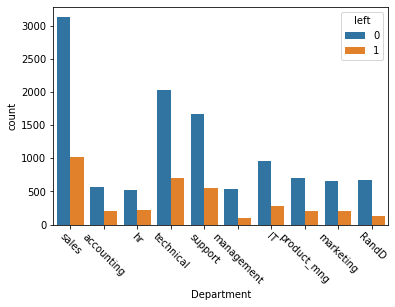

In [8]:
#now lets look at effect of department and salary on employee exit 
sns.countplot(x="Department",hue="left",data=hr_data)
plt.xticks(rotation=-45) #for effective visualization of x labels i rotated the labels
plt.show()
#employees from sales, technical, support are more likely to leave 

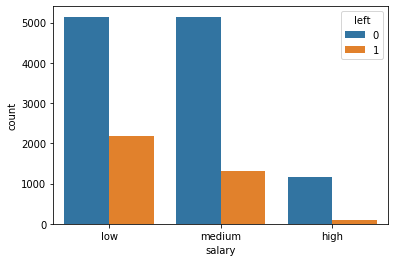

In [9]:
sns.countplot(x="salary",hue="left",data=hr_data)
plt.show()
#from the plot we can observe that employees with low and medium salaries are most likely to leave 

In [10]:
#lets look at salary and department columns in data
hr_data.salary=hr_data.salary.astype("category").cat.codes
hr_data.salary
#salary column is converted into numerical values

0        1
1        2
2        2
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: salary, Length: 14999, dtype: int8

In [11]:
#we can either use get dummies or label encoder method to encode the department column

In [12]:
dep=pd.get_dummies(hr_data.Department)
#after using get dummies we need to drop any one column from the encoded data frame so that the machine doesnt fall into dummy variable trap
dep=dep.drop("RandD",axis="columns")
dep.head()
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1


In [13]:
#now we need to add the encoded columns to our original data by dropping the department from dataset
hr_data=hr_data.drop("Department",axis="columns")
hr_data=pd.concat([hr_data,dep],axis="columns")
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,IT,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,2,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,1,0,0


In [14]:
#train test split and model building
from sklearn.linear_model import LogisticRegression

In [15]:
x=hr_data.drop(["left"],axis=1)
y=hr_data.left

In [16]:
# generally test_size varies depending on the developer 

In [17]:
model=LogisticRegression()
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [18]:
x_train.shape

(10499, 17)

In [19]:
x_test.shape

(4500, 17)

In [20]:
y_train.shape

(10499,)

In [21]:
y_test.shape

(4500,)

In [22]:
model.fit(x_train,y_train)

C:\Users\MASEED FARHANA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
train_accuracy=model.score(x_train,y_train)
test_accuracy=model.score(x_test,y_test)
print("train accuracy : ", train_accuracy)
print("test accuracy : ", test_accuracy)

train accuracy :  0.7708353176492999
test accuracy :  0.7597777777777778


In [24]:
y_predicted=model.predict(x_test)
y_predicted

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [25]:
from sklearn.metrics import confusion_matrix
cm_lr=confusion_matrix(y_test,y_predicted)
cm_lr

array([[3156,  236],
       [ 845,  263]], dtype=int64)

In [26]:
intercept=model.intercept_
coefficients=model.coef_
print("intercepts is : ",intercept)
print("coefficients are : ",coefficients)

intercepts is :  [-0.08580682]
coefficients are :  [[-4.10740883  0.69489038 -0.28878908  0.00441205  0.24915039 -1.58467968
  -0.88436728 -0.02937124  0.09384096  0.14573916  0.50379917 -0.67639095
   0.19198048 -0.05461448  0.17488505  0.33624907  0.33087444]]


In [27]:
#**using decision tree**
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [28]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [29]:
dt.score(x_test,y_test)

0.9735555555555555

In [30]:
test_accuracy=dt.score(x_test,y_test)
print("test accuracy : ", test_accuracy)

test accuracy :  0.9735555555555555


In [31]:
y_predicted=dt.predict(x_test)
cm_dt=confusion_matrix(y_test,y_predicted)
cm_dt

array([[3312,   80],
       [  39, 1069]], dtype=int64)

In [32]:
#knearest neighbours
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=2,metric="euclidean")

In [33]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [34]:
knn.score(x_test,y_test)

0.9508888888888889

In [35]:
test_accuracy=knn.score(x_test,y_test)
print("test accuracy : ", test_accuracy)

test accuracy :  0.9508888888888889


In [36]:
y_predicted=knn.predict(x_test)
cm_knn=confusion_matrix(y_test,y_predicted)
cm_knn

array([[3280,  112],
       [ 109,  999]], dtype=int64)

In [37]:
imp_features=pd.DataFrame(columns=["features","importance"])
imp_features["features"]=x_train.columns
imp_features["importance"]=dt.feature_importances_
imp_features[:3]
#top 3 important features

,features,importance
0,satisfaction_level,0.495081
1,last_evaluation,0.162815
2,number_project,0.103424


In [38]:
#from the above models it is evident that decision tree algorithm has the highest accuracy compared to knn and logistic regression , with an accuracy of 98.466%

In [38]:
import pickle
pickle.dump(model,open('log_reg.pkl','wb'))
pickle.dump(dt,open('dt.pkl','wb'))
pickle.dump(knn,open('knn.pkl','wb'))

In [40]:
x_train.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'salary', 'IT', 'accounting', 'hr',
       'management', 'marketing', 'product_mng', 'sales', 'support',
       'technical'],
      dtype='object')